In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the dataset ---
# Make sure this file '1- mental-illnesses-prevalence.csv' is in your working directory
# or provide the full path to the file.
try:
    df_prevalence = pd.read_csv("archive/1- mental-illnesses-prevalence.csv")
    print("Successfully loaded '1- mental-illnesses-prevalence.csv'")
except FileNotFoundError:
    print(
        "Error: '1- mental-illnesses-prevalence.csv' not found. Please ensure the file is in the correct directory."
    )
    exit()  # Exit if the file cannot be loaded

# --- Initial Inspection ---
print("\n--- Initial Inspection: df_prevalence ---")
print("First 5 rows:")
print(df_prevalence.head())

print("\nColumn information:")
print(df_prevalence.info())

print("\nMissing values per column:")
print(df_prevalence.isnull().sum())

print("\nDescriptive statistics:")
print(df_prevalence.describe())

# --- Rename the prevalence column for easier access (adjust if the name differs) ---
# Assuming the actual prevalence column name is like 'Prevalence - Mental disorders - Sex: Both - Age: All Ages (Percent)'
# You might need to adjust this based on the actual column name in your file's head() output.
# Let's find the column that contains 'Prevalence' and 'Percent'
prevalence_col = [
    col for col in df_prevalence.columns if "Prevalence" in col and "Percent" in col
]
if len(prevalence_col) == 1:
    df_prevalence.rename(
        columns={prevalence_col[0]: "Prevalence_Percent"}, inplace=True
    )
    print(f"\nRenamed column '{prevalence_col[0]}' to 'Prevalence_Percent'.")
elif len(prevalence_col) > 1:
    print(
        f"\nWarning: Multiple 'Prevalence' and 'Percent' columns found. Please manually identify and rename the correct one: {prevalence_col}"
    )
else:
    print(
        "\nError: Could not find a suitable 'Prevalence' column to rename. Please check column names."
    )

# --- Handle Missing Values (Example: Impute with median for numerical, or drop rows) ---
# For simplicity, if 'Prevalence_Percent' has missing values, we'll fill with the median.
# For 'Code', if missing, it's often best to leave as NaN or a specific 'Unknown' category.
if (
    "Prevalence_Percent" in df_prevalence.columns
    and df_prevalence["Prevalence_Percent"].isnull().any()
):
    median_prevalence = df_prevalence["Prevalence_Percent"].median()
    df_prevalence["Prevalence_Percent"].fillna(median_prevalence, inplace=True)
    print(
        f"\nFilled missing 'Prevalence_Percent' values with median: {median_prevalence}"
    )

# --- Univariate Analysis ---
print("\n--- Univariate Analysis: df_prevalence ---")

# Distribution of Prevalence
plt.figure(figsize=(10, 6))
sns.histplot(df_prevalence["Prevalence_Percent"], kde=True)
plt.title("Distribution of Mental Illness Prevalence")
plt.xlabel("Prevalence (%)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Top/Bottom Entities by Average Prevalence
avg_prevalence_by_entity = (
    df_prevalence.groupby("Entity")["Prevalence_Percent"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 7))
avg_prevalence_by_entity.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Entities by Average Mental Illness Prevalence")
plt.xlabel("Entity")
plt.ylabel("Average Prevalence (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
avg_prevalence_by_entity.tail(10).plot(kind="bar", color="lightcoral")
plt.title("Bottom 10 Entities by Average Mental Illness Prevalence")
plt.xlabel("Entity")
plt.ylabel("Average Prevalence (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Time Series Analysis ---
print("\n--- Time Series Analysis: df_prevalence ---")

# Global average prevalence over time (excluding 'World' or similar aggregations if present)
# Filter out aggregated entities if they exist (e.g., 'World', 'Global') for country-specific analysis trends
# You might need to adjust this list based on what constitutes an 'aggregated' entity in your data.
aggregated_entities = [
    "World",
    "Global",
    "OECD",
    "EU",
    "North America",
    "South America",
    "Africa",
    "Asia",
    "Europe",
    "Oceania",
]
df_filtered_prevalence = df_prevalence[
    ~df_prevalence["Entity"].isin(aggregated_entities)
]

avg_prevalence_over_time = df_filtered_prevalence.groupby("Year")[
    "Prevalence_Percent"
].mean()

plt.figure(figsize=(12, 6))
avg_prevalence_over_time.plot(kind="line", marker="o", color="green")
plt.title("Global Average Mental Illness Prevalence Over Time")
plt.xlabel("Year")
plt.ylabel("Average Prevalence (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Prevalence trend for a few selected countries
# You can choose countries of interest after inspecting the top/bottom lists
selected_countries = [
    "United States",
    "India",
    "China",
    "United Kingdom",
    "Ethiopia",
]  # Example countries

plt.figure(figsize=(12, 7))
for country in selected_countries:
    country_data = df_prevalence[df_prevalence["Entity"] == country]
    if not country_data.empty:
        plt.plot(
            country_data["Year"],
            country_data["Prevalence_Percent"],
            marker="o",
            label=country,
        )
plt.title("Mental Illness Prevalence Trends for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

print("\n--- EDA for '1- mental-illnesses-prevalence.csv' Completed ---")

Successfully loaded '1- mental-illnesses-prevalence.csv'

--- Initial Inspection: df_prevalence ---
First 5 rows:
        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1           

KeyError: 'Prevalence_Percent'

<Figure size 1000x600 with 0 Axes>

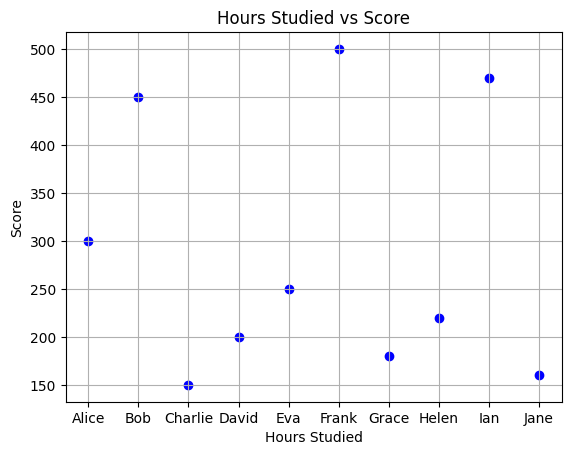

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"archive/Data.csv")

plt.scatter(df["Name"], df["Sales"], color="blue")
plt.title("Hours Studied vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid(True)
plt.show()

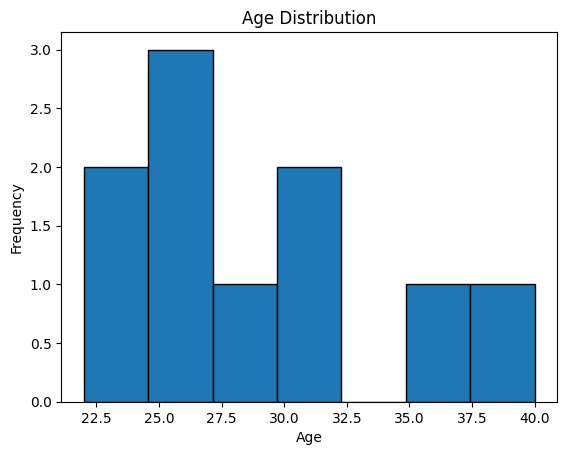

In [ ]:
plt.hist(df["Age"], bins=7, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

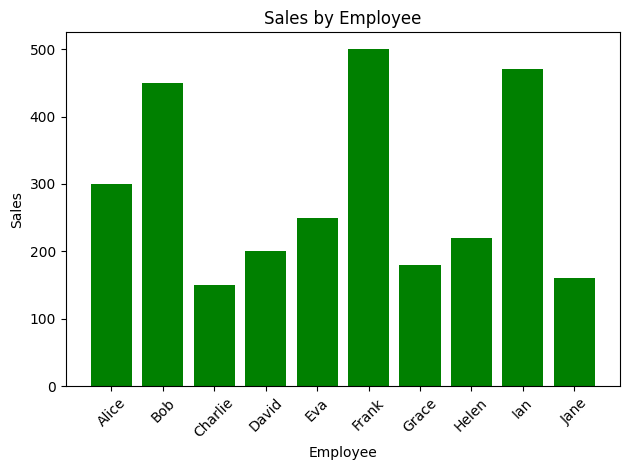

In [ ]:
plt.bar(df["Name"], df["Sales"], color="green")
plt.xticks(rotation=45)
plt.title("Sales by Employee")
plt.xlabel("Employee")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

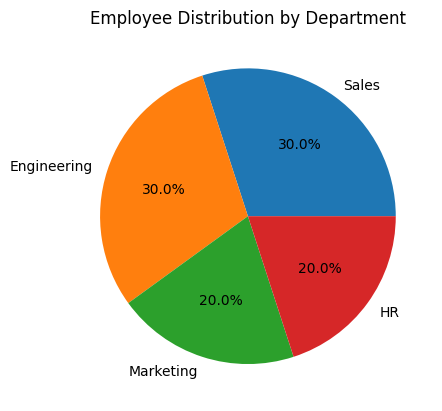

In [ ]:
dept_counts = df["Department"].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct="%1.1f%%")
plt.title("Employee Distribution by Department")
plt.show()